# Analyzing Live data from Twitter

collecting various tweets consisting "#Black Lives" and apply visualization techniques to get some insights about the data?"

In [84]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

import tweepy as tw
import nltk
from nltk.corpus import stopwords
import re
import networkx

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

In [85]:
consumer_key = 'Wx2NGhEFf24gguut2POPOijyI'
consumer_secret = '439pKZWbcTYCDRHMacoxNekNkX8FXtQQ4mQubdcfGwTpAa2Tlt'
access_token = '1286207842714701824-3347pOOnnLdZNhJZUtS9jtBDoZyqqQ'
access_secret = '0HrGH2yhQ3ZXapcEALV0NeUBnrPnJzFsYKcY5tqMnru6f'

In [86]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [102]:
search_term = "#black+lives -filter:retweets"

tweets = tw.Cursor(api.search,q=search_term,lang="en",since='2018-11-01').items(100)

all_tweets = [tweet.text for tweet in tweets]

all_tweets[:5]

['#Black Society Does NOT Condone "Black Lives Matter"! Democrats Do! These Are DESTRUCTIVE UNEMPLOYED BORED People! https://t.co/uvXet6OmXN',
 'I will continue to combat #anti-#Black #racism AND #antisemitism. A society that is fairer and more just for… https://t.co/M6fEiRJdmi',
 'The #White #Left Needs to Embrace #Black #Leadership https://t.co/4eS70kAzSY | @thenation',
 'If you a white #parent  think of your own child - How would you would feel if #PoliceBrutality harmed your family?… https://t.co/mYfJSE46fJ',
 '@JoeBiden Joe will be one of the bestest Presidents ever #BLACK LIVES MATTER #KLANDEMIC']

In [103]:
def remove_url(txt):
    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())
all_tweets_no_urls = [remove_url(tweet) for tweet in all_tweets]
all_tweets_no_urls[:5]

['Black Society Does NOT Condone Black Lives Matter Democrats Do These Are DESTRUCTIVE UNEMPLOYED BORED People',
 'I will continue to combat antiBlack racism AND antisemitism A society that is fairer and more just for',
 'The White Left Needs to Embrace Black Leadership thenation',
 'If you a white parent think of your own child How would you would feel if PoliceBrutality harmed your family',
 'JoeBiden Joe will be one of the bestest Presidents ever BLACK LIVES MATTER KLANDEMIC']

In [104]:
all_tweets_no_urls[0].split()

['Black',
 'Society',
 'Does',
 'NOT',
 'Condone',
 'Black',
 'Lives',
 'Matter',
 'Democrats',
 'Do',
 'These',
 'Are',
 'DESTRUCTIVE',
 'UNEMPLOYED',
 'BORED',
 'People']

In [105]:
all_tweets_no_urls[0].lower().split()

['black',
 'society',
 'does',
 'not',
 'condone',
 'black',
 'lives',
 'matter',
 'democrats',
 'do',
 'these',
 'are',
 'destructive',
 'unemployed',
 'bored',
 'people']

In [107]:
words_in_tweet = [tweet.lower().split() for tweet in all_tweets_no_urls]
words_in_tweet[:2]

[['black',
  'society',
  'does',
  'not',
  'condone',
  'black',
  'lives',
  'matter',
  'democrats',
  'do',
  'these',
  'are',
  'destructive',
  'unemployed',
  'bored',
  'people'],
 ['i',
  'will',
  'continue',
  'to',
  'combat',
  'antiblack',
  'racism',
  'and',
  'antisemitism',
  'a',
  'society',
  'that',
  'is',
  'fairer',
  'and',
  'more',
  'just',
  'for']]

In [108]:
all_words_no_urls = list(itertools.chain(*words_in_tweet))

# Create counter
counts_no_urls = collections.Counter(all_words_no_urls)

counts_no_urls.most_common(15)

[('black', 74),
 ('lives', 60),
 ('the', 48),
 ('matter', 41),
 ('and', 38),
 ('of', 36),
 ('to', 34),
 ('a', 29),
 ('is', 21),
 ('for', 20),
 ('in', 17),
 ('are', 15),
 ('this', 13),
 ('on', 12),
 ('my', 12)]

In [109]:
clean_tweets_no_urls = pd.DataFrame(counts_no_urls.most_common(15),
                             columns=['words', 'count'])

clean_tweets_no_urls

,words,count
0,black,74
1,lives,60
2,the,48
3,matter,41
4,and,38
5,of,36
6,to,34
7,a,29
8,is,21
9,for,20


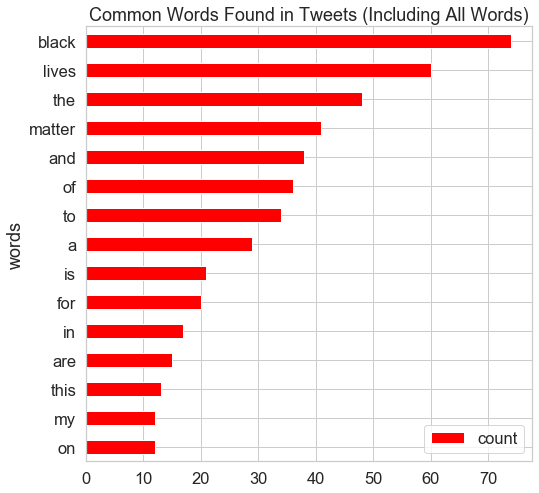

In [110]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_no_urls.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="red")

ax.set_title("Common Words Found in Tweets (Including All Words)")

plt.show()


In [111]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yasha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [112]:
stop_words = set(stopwords.words('english'))

# View a few words from the set
list(stop_words)[0:10]

['was', 'have', 'am', 'between', 'him', 'them', 'aren', 'she', 'wouldn', 'don']

In [113]:
words_in_tweet[0]

['black',
 'society',
 'does',
 'not',
 'condone',
 'black',
 'lives',
 'matter',
 'democrats',
 'do',
 'these',
 'are',
 'destructive',
 'unemployed',
 'bored',
 'people']

In [114]:
tweets_nsw = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in words_in_tweet]

tweets_nsw[0]

['black',
 'society',
 'condone',
 'black',
 'lives',
 'matter',
 'democrats',
 'destructive',
 'unemployed',
 'bored',
 'people']

In [115]:
all_words_nsw = list(itertools.chain(*tweets_nsw))

counts_nsw = collections.Counter(all_words_nsw)

counts_nsw.most_common(15)

[('black', 74),
 ('lives', 60),
 ('matter', 41),
 ('blacklivesmatter', 9),
 ('support', 7),
 ('african', 6),
 ('movement', 6),
 ('tribute', 6),
 ('rights', 6),
 ('smith', 6),
 ('one', 5),
 ('first', 5),
 ('president', 5),
 ('blm', 5),
 ('dont', 5)]

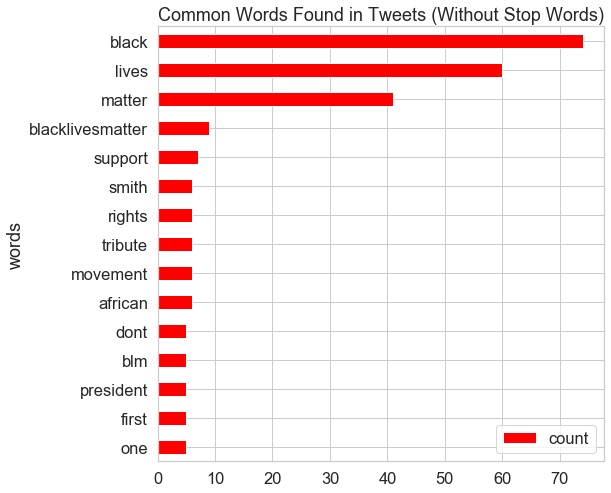

In [116]:
clean_tweets_nsw = pd.DataFrame(counts_nsw.most_common(15),
                             columns=['words', 'count'])

fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_nsw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="red")

ax.set_title("Common Words Found in Tweets (Without Stop Words)")

plt.show()
